In [7]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

import time
import numpy as np

In [2]:
%%time

path_to_file = './data/wiki-Vote/wiki-Vote.txt'
G_dir = nx.read_edgelist(path_to_file, comments='#', delimiter='\t', nodetype=int, create_using=nx.DiGraph())
G_undir = nx.read_edgelist(path_to_file, comments='#', delimiter='\t', nodetype=int)

CPU times: user 703 ms, sys: 34.9 ms, total: 738 ms
Wall time: 742 ms


In [3]:
%%time
LSCC_dir = max(nx.strongly_connected_component_subgraphs(G_dir), key=len)
LWCC_dir = max(nx.weakly_connected_component_subgraphs(G_dir), key=len)

#LSCC_undir = nx.strongly_connected_components(G_undir)

CPU times: user 18.2 s, sys: 54.2 ms, total: 18.3 s
Wall time: 18.3 s


In [4]:
%%time
print(LSCC_dir.number_of_edges())
print(LSCC_dir.number_of_nodes())

print(LWCC_dir.number_of_edges())
print(LWCC_dir.number_of_nodes())

39456
1300
103663
7066
CPU times: user 5.05 ms, sys: 1.66 ms, total: 6.71 ms
Wall time: 6.17 ms


In [4]:
%%time
start = time.time()
dist_dir = []
count = 0
for i in G_dir.nodes:
    for j in G_dir.nodes:
        if nx.has_path(G_dir,i,j):
            dist_dir.append(nx.shortest_path_length(G_dir,i,j))
        if(count%100000 == 0):
            print(round(time.time() - start,2), '\t seconds since start')
        count = count + 1

0.0 	 seconds since start
3.52 	 seconds since start
5.41 	 seconds since start
9.43 	 seconds since start
12.55 	 seconds since start
14.87 	 seconds since start
17.53 	 seconds since start
19.41 	 seconds since start
21.79 	 seconds since start
24.49 	 seconds since start
26.72 	 seconds since start
28.43 	 seconds since start
30.45 	 seconds since start
32.05 	 seconds since start
35.24 	 seconds since start
37.6 	 seconds since start
39.11 	 seconds since start
41.72 	 seconds since start
43.99 	 seconds since start
46.4 	 seconds since start
48.14 	 seconds since start
50.28 	 seconds since start
51.91 	 seconds since start
53.16 	 seconds since start
56.11 	 seconds since start
58.21 	 seconds since start
60.35 	 seconds since start
62.63 	 seconds since start
64.26 	 seconds since start
66.03 	 seconds since start
69.49 	 seconds since start
72.7 	 seconds since start
75.03 	 seconds since start
76.99 	 seconds since start
79.63 	 seconds since start
82.95 	 seconds since start


In [11]:
print('median distance: ',np.percentile(dist_dir,50))
print('mean distance: ',np.mean(dist_dir))
print('diameter: ',np.max(dist_dir))
print('effective diameter: ',np.percentile(dist_dir,90))

median distance:  3.0
mean distance:  3.33902266947
diameter:  10
effective diameter:  4.0


In [5]:
G_dir[1608]

AtlasView({15: {}, 214: {}, 230: {}, 285: {}, 290: {}, 298: {}, 332: {}, 350: {}, 403: {}, 407: {}, 415: {}, 506: {}, 559: {}, 575: {}, 587: {}, 633: {}, 665: {}, 737: {}, 761: {}, 762: {}, 763: {}, 765: {}, 836: {}, 859: {}, 887: {}, 904: {}, 908: {}, 913: {}, 937: {}, 947: {}, 959: {}, 968: {}, 975: {}, 993: {}, 1000: {}, 1031: {}, 1034: {}, 1035: {}, 1049: {}, 1061: {}, 1097: {}, 1103: {}, 1111: {}, 1124: {}, 1137: {}, 1140: {}, 1151: {}, 1165: {}, 1168: {}, 1186: {}, 1199: {}, 1201: {}, 1211: {}, 1230: {}, 1243: {}, 1248: {}, 1250: {}, 1253: {}, 1261: {}, 1267: {}, 1279: {}, 1284: {}, 1291: {}, 1297: {}, 1307: {}, 1319: {}, 1322: {}, 1353: {}, 1357: {}, 1374: {}, 1378: {}, 1384: {}, 1390: {}, 1393: {}, 1407: {}, 1416: {}, 1419: {}, 1428: {}, 1442: {}, 1444: {}, 1453: {}, 1471: {}, 1482: {}, 1489: {}, 1492: {}, 1514: {}, 1520: {}, 1521: {}, 1525: {}, 1534: {}, 1542: {}, 1549: {}, 1565: {}, 1566: {}, 1583: {}, 1585: {}, 1592: {}, 1604: {}, 1610: {}, 1612: {}, 1613: {}, 1619: {}, 1621

In [15]:
nx.shortest_path_length(G_dir, 3, 1622)

3

AttributeError: 'AtlasView' object has no attribute 'edges'

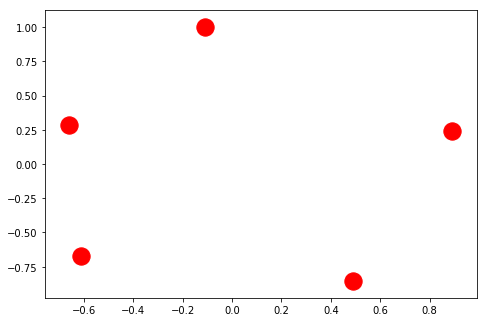

In [48]:
%%time
nx.draw(G_dir)
